In [115]:
import imp
import tools
imp.reload(tools)

<module 'tools' from '/Users/marat/Documents/DS/git/tools.py'>

Capital 31.27M


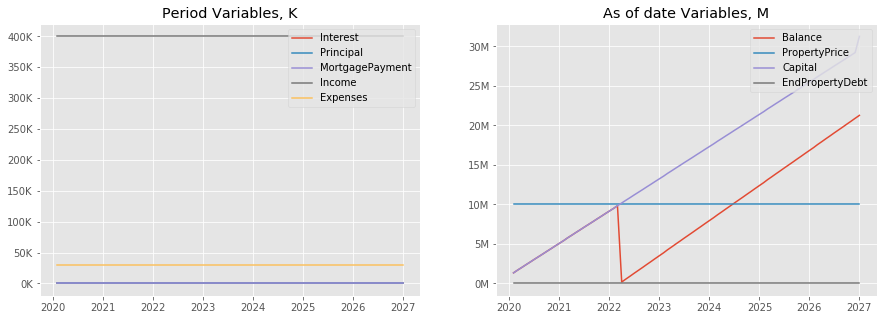

In [116]:
s = tools.investing_simulator(
    Scenario = 'Rent&Buy',
    Income = 400000,
    IYearGrowth = 0,
    Expenses = 30000,
    EYearGrowth = 0,
    SavingsInitial = 1000000,
    PropertyPrice = 10000000,
    PPYearGrowth = 0,
    Years = 7,
    DepositRate = 0,
    Rent = 30000,
    RYearGrowth = 0,
    MortgageRate = 0.12,
    MortgageTermMonths = 60,
    isDetailed = True
)

Capital 39.56M


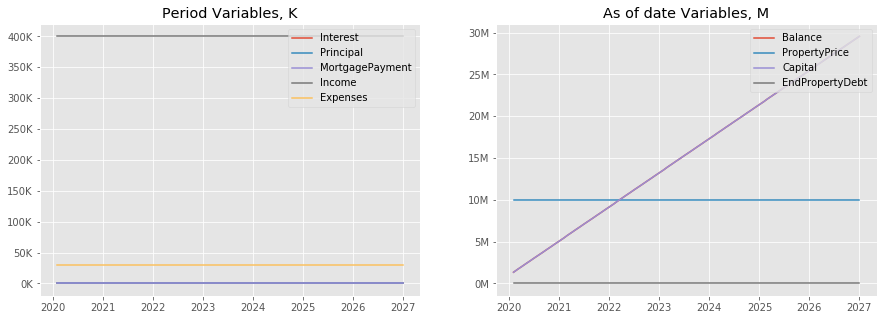

In [117]:
s = tools.investing_simulator(
    Scenario = 'Only Renting',
    Income = 400000,
    IYearGrowth = 0,
    Expenses = 30000,
    EYearGrowth = 0,
    SavingsInitial = 1000000,
    PropertyPrice = 10000000,
    PPYearGrowth = 0,
    Years = 7,
    DepositRate = 0,
    Rent = 30000,
    RYearGrowth = 0,
    MortgageRate = 0.12,
    MortgageTermMonths = 60,
    isDetailed = True
)

Capital 38.39M


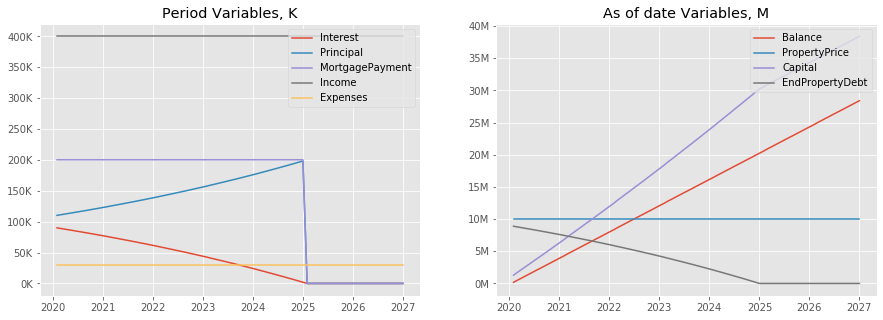

In [118]:
s = tools.investing_simulator(
    Scenario = 'Standard Mortgage',
    Income = 400000,
    IYearGrowth = 0,
    Expenses = 30000,
    EYearGrowth = 0,
    SavingsInitial = 1000000,
    PropertyPrice = 10000000,
    PPYearGrowth = 0,
    Years = 7,
    DepositRate = 0,
    Rent = 30000,
    RYearGrowth = 0,
    MortgageRate = 0.12,
    MortgageTermMonths = 60,
    isDetailed = True
)

Capital 31.08M


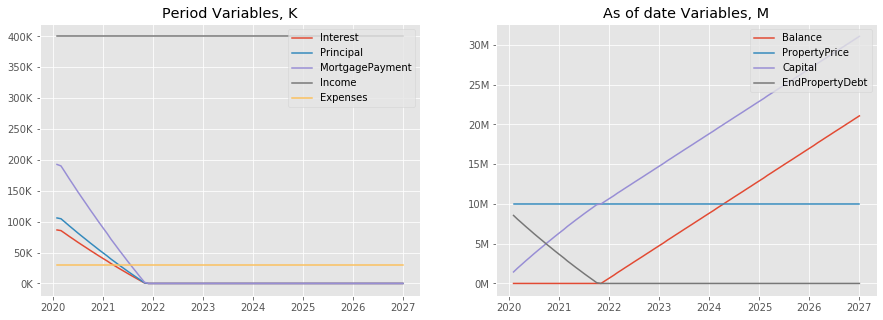

In [119]:
s = tools.investing_simulator(
    Scenario = 'Early Repayment Mortgage',
    Income = 400000,
    IYearGrowth = 0,
    Expenses = 30000,
    EYearGrowth = 0,
    SavingsInitial = 1000000,
    PropertyPrice = 10000000,
    PPYearGrowth = 0,
    Years = 7,
    DepositRate = 0,
    Rent = 30000,
    RYearGrowth = 0,
    MortgageRate = 0.12,
    MortgageTermMonths = 60,
    isDetailed = True
)